## Load and Initial Data Exploration

In [1]:
import pandas as pd

df = pd.read_csv('/content/Pharma_Industry.csv')

print("DataFrame Shape:", df.shape)
print("\nDataFrame Info:")
df.info()
print("\nFirst 5 Rows of DataFrame:")
print(df.head())

DataFrame Shape: (500, 6)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB

First 5 Rows of DataFrame:
   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.3636

## Exploratory Data Analysis (EDA) - Distributions

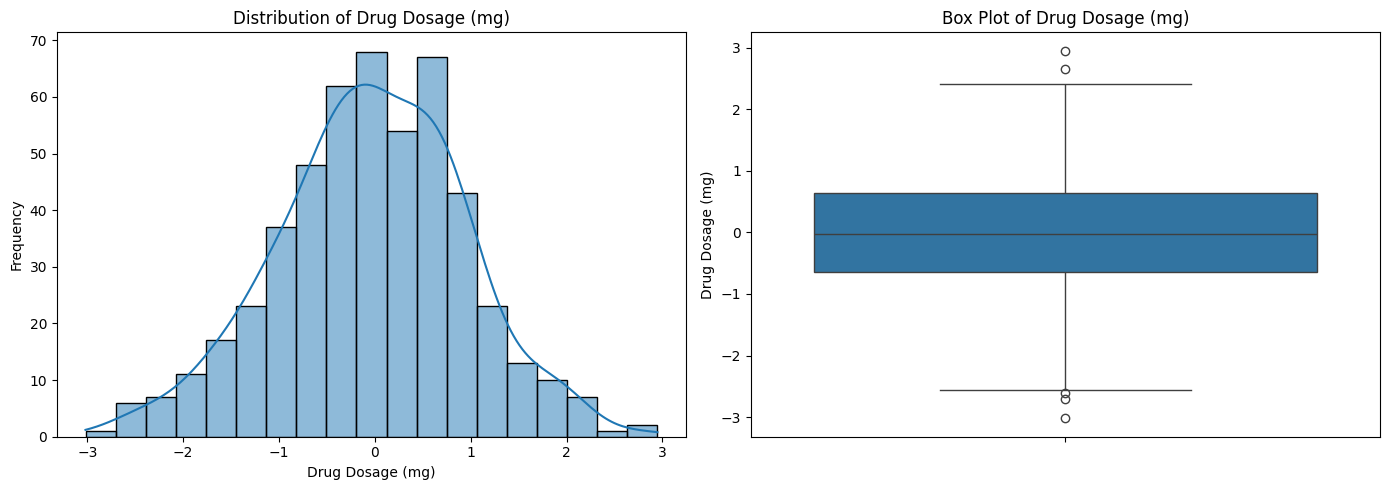

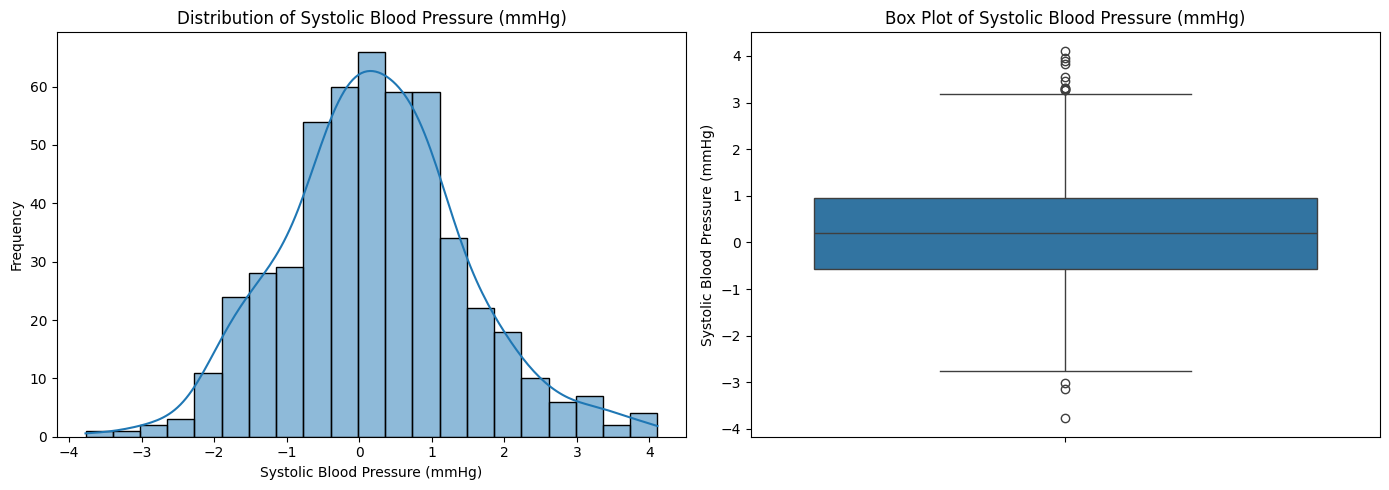

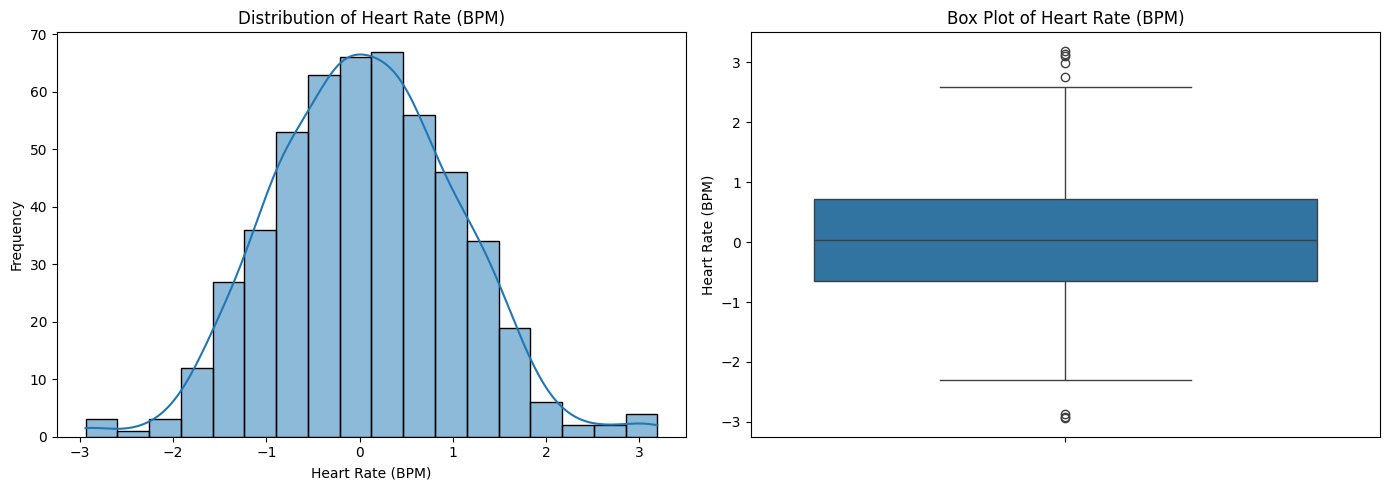

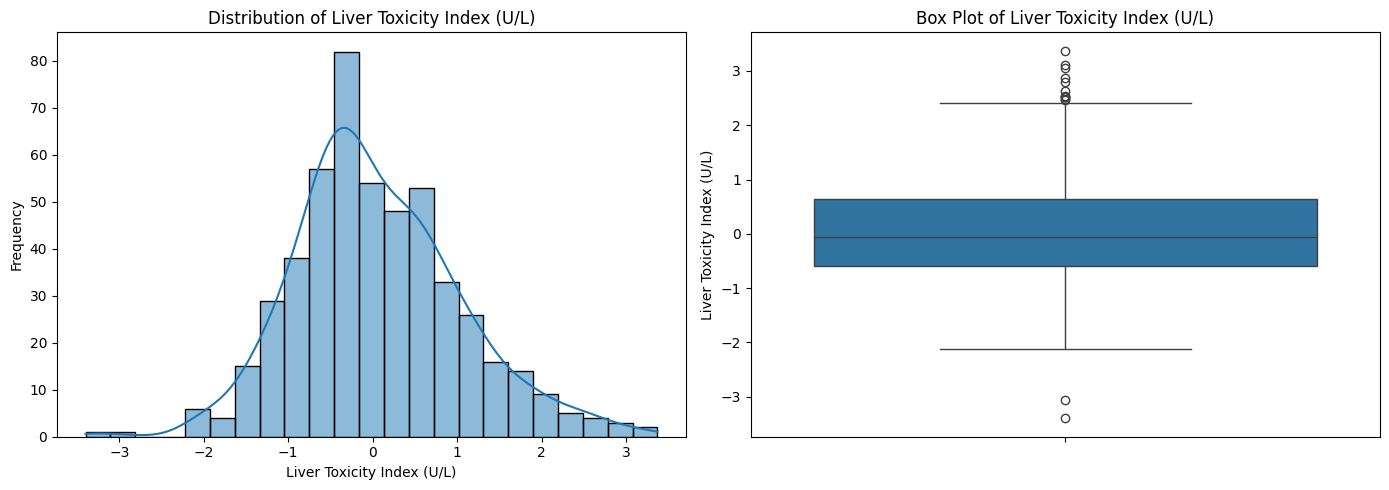

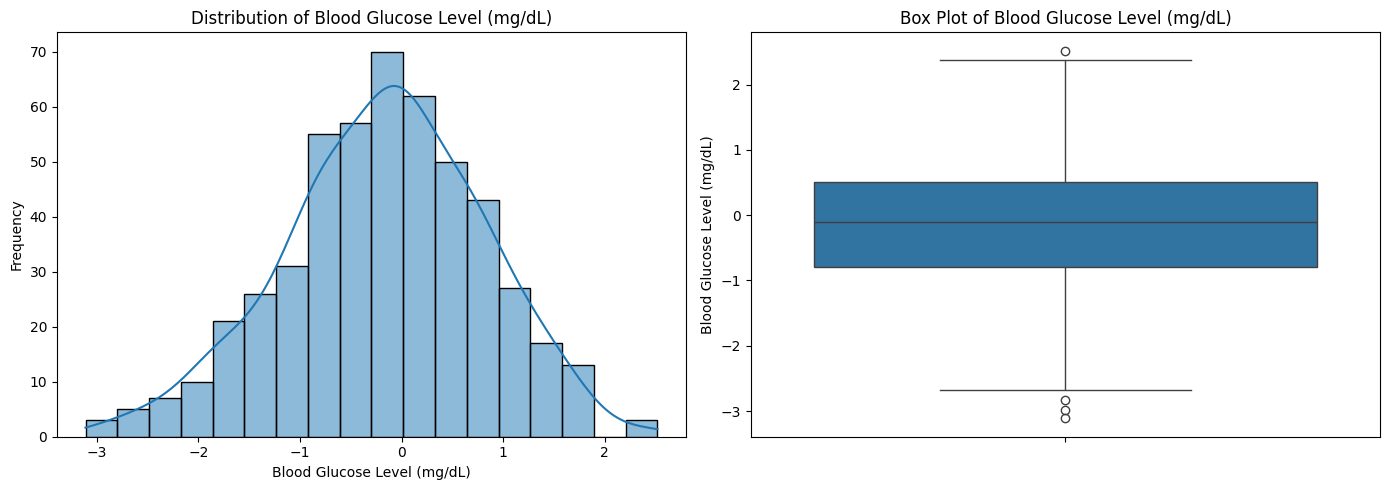

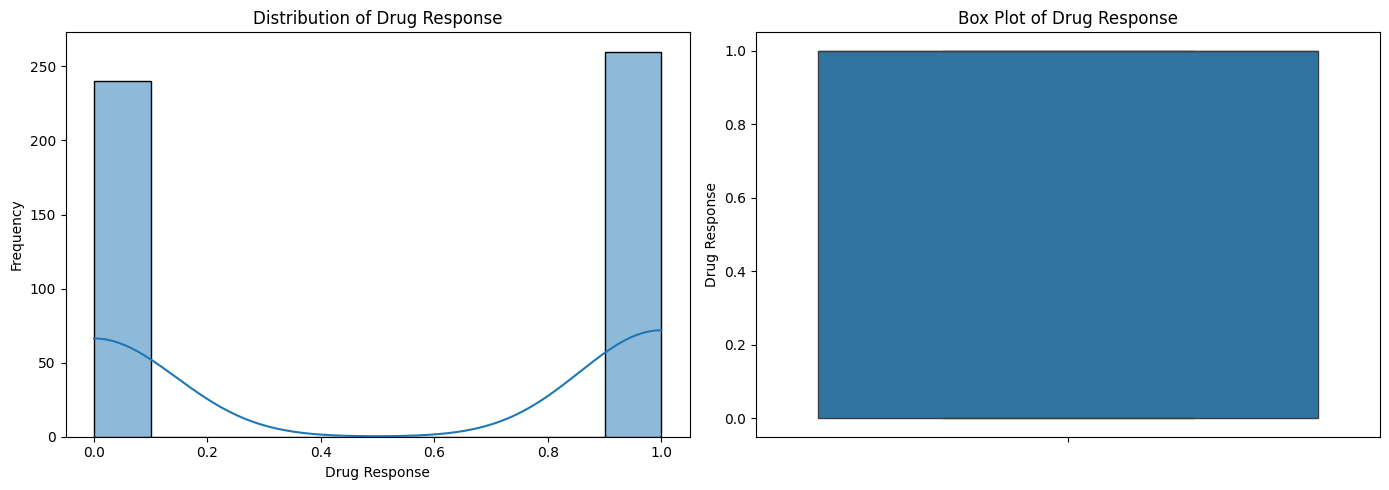

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'Drug Dosage (mg)',
    'Systolic Blood Pressure (mmHg)',
    'Heart Rate (BPM)',
    'Liver Toxicity Index (U/L)',
    'Blood Glucose Level (mg/dL)',
    'Drug Response'
]

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()


## Exploratory Data Analysis (EDA) - Correlations

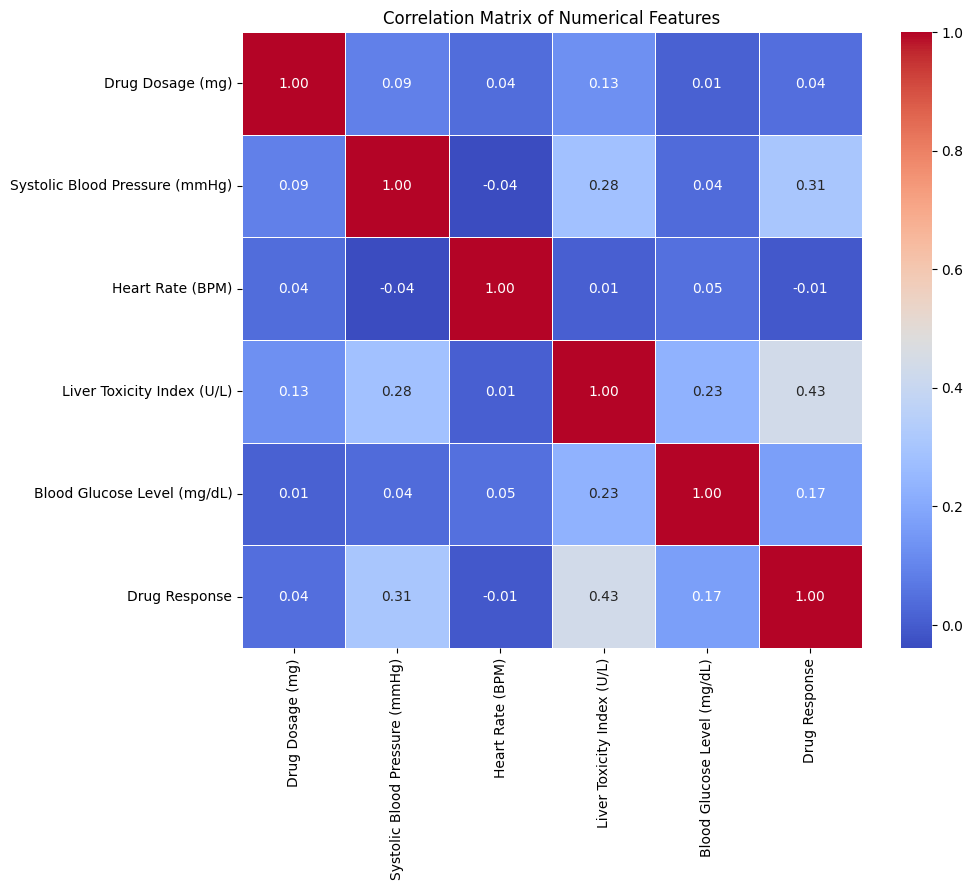

In [3]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Preprocessing


In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 5)
X_test shape: (100, 5)
y_train shape: (400,)
y_test shape: (100,)


## Visualize Class Distribution and Relationships

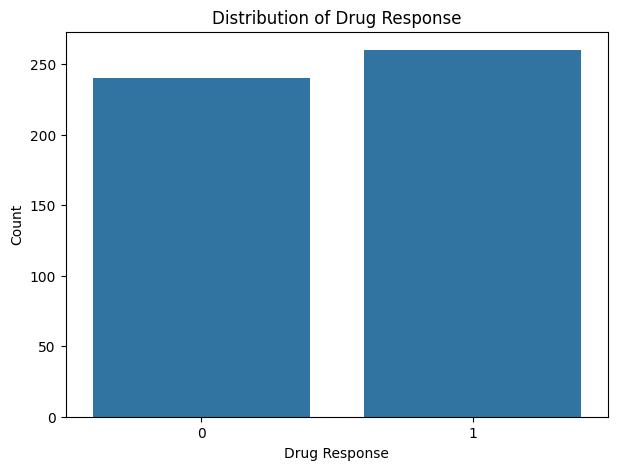

Generating pair plot (this might take a moment)...


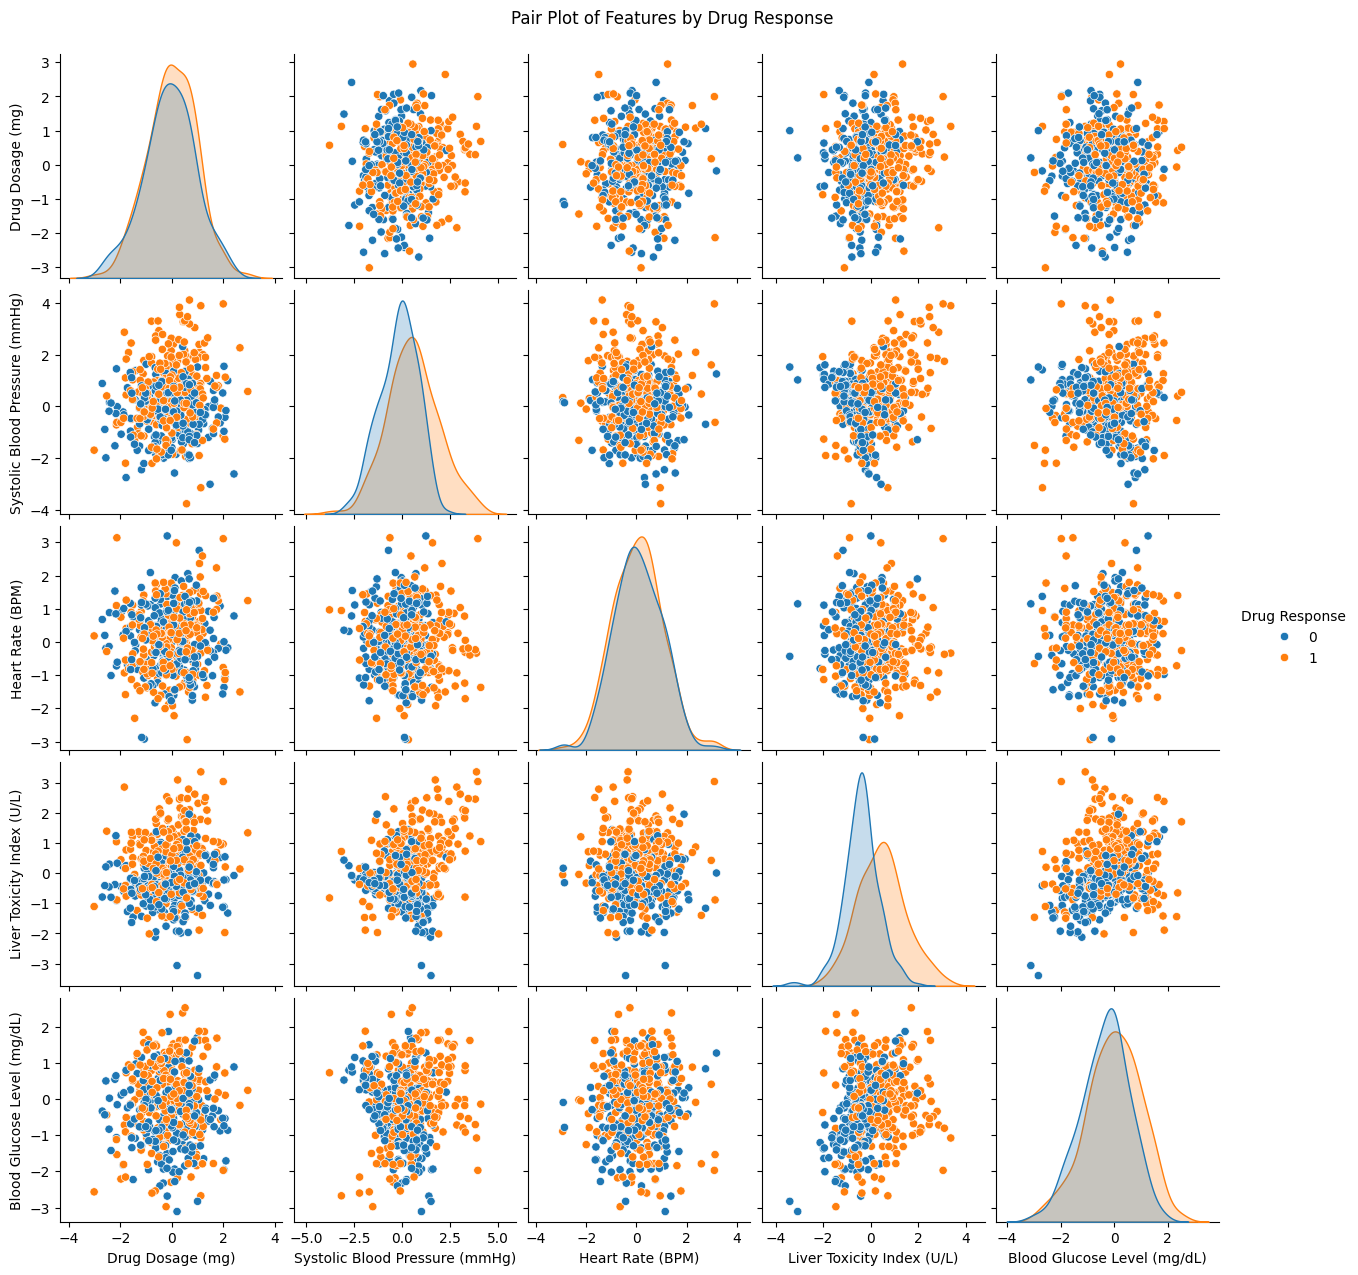

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for 'Drug Response'
plt.figure(figsize=(7, 5))
sns.countplot(x='Drug Response', data=df)
plt.title('Distribution of Drug Response')
plt.xlabel('Drug Response')
plt.ylabel('Count')
plt.show()

# Generate a pair plot for all features, with 'Drug Response' as hue
# This might take a while for large datasets
print("Generating pair plot (this might take a moment)...")
sns.pairplot(df, hue='Drug Response', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Drug Response', y=1.02) # Adjust title position
plt.show()


## Implement and Train Basic SVM Model

In [6]:
from sklearn.svm import SVC

# Instantiate a basic SVM classifier with default parameters
svm_model_basic = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_model_basic.fit(X_train, y_train)

print("Basic SVM model trained successfully.")

Basic SVM model trained successfully.


## Evaluate Basic SVM Model Performance

Basic SVM Model Accuracy: 0.8200

Basic SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.87      0.80      0.83        56

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



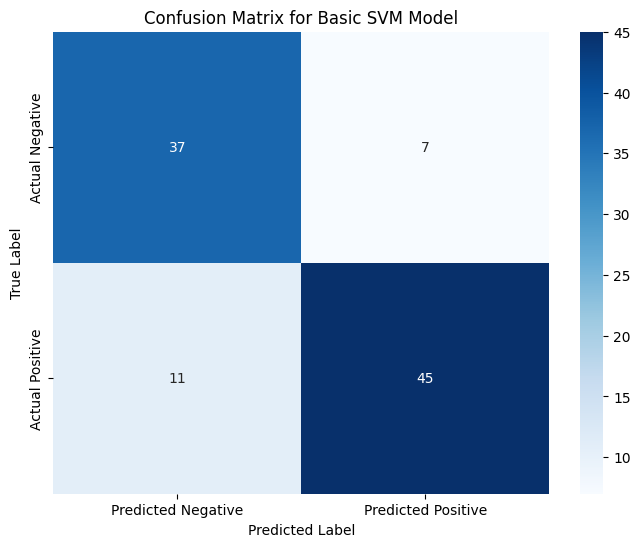

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred_basic = svm_model_basic.predict(X_test)

# Calculate accuracy
accuracy_basic = accuracy_score(y_test, y_pred_basic)
print(f"Basic SVM Model Accuracy: {accuracy_basic:.4f}")

# Generate classification report
print("\nBasic SVM Model Classification Report:")
print(classification_report(y_test, y_pred_basic))

# Compute confusion matrix
conf_matrix_basic = confusion_matrix(y_test, y_pred_basic)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_basic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Basic SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Parameter Tuning and Optimization

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Instantiate an SVC model
svm_model = SVC(random_state=42)

# Instantiate GridSearchCV
# cv=5 for 5-fold cross-validation
# verbose=3 to see the progress
# n_jobs=-1 to use all available CPU cores for parallel processing
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for hyperparameter tuning...")
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("\nBest parameters found:", grid_search.best_params_)

# Print the best score achieved with the optimal parameters
print("Best cross-validation score:", grid_search.best_score_)

Starting GridSearchCV for hyperparameter tuning...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters found: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.7575000000000001


## Analyze and Compare SVM Models

Optimized SVM model retrieved successfully.

Optimized SVM Model Accuracy: 0.7800

Optimized SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.80      0.80      0.80        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



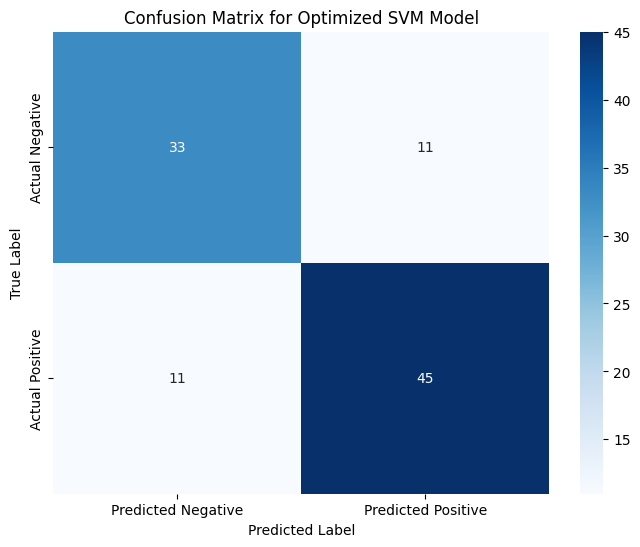

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Retrieve the best estimator from GridSearchCV
svm_model_optimized = grid_search.best_estimator_
print("Optimized SVM model retrieved successfully.")

# Make predictions on the test set using the optimized model
y_pred_optimized = svm_model_optimized.predict(X_test)

# Calculate accuracy for the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"\nOptimized SVM Model Accuracy: {accuracy_optimized:.4f}")

# Generate classification report for the optimized model
print("\nOptimized SVM Model Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# Compute confusion matrix for the optimized model
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

# Visualize confusion matrix for the optimized model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Optimized SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Comparison of Basic and Optimized SVM Models

**Basic SVM Model Performance (from previous output):**
- **Accuracy:** `0.8200`
- **Classification Report:**
```
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.87      0.80      0.83        56

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100
```

**Optimized SVM Model Performance (current output):**
- **Accuracy:** `0.7800`
- **Classification Report:**
```
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.80      0.80      0.80        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100
```

**Comparison and Analysis:**

1.  **Overall Accuracy:** The basic SVM model achieved an accuracy of `0.8200`, while the optimized SVM model achieved `0.7800`. In this specific case, the basic model performed slightly better in terms of overall accuracy on the test set.

2.  **Class 0 (Negative Drug Response):**
    *   **Basic SVM:** Precision = 0.77, Recall = 0.84, F1-score = 0.80
    *   **Optimized SVM:** Precision = 0.75, Recall = 0.75, F1-score = 0.75
    For Class 0, the basic model had higher recall (better at identifying actual negative cases) and a slightly higher F1-score, indicating better overall performance for this class.

3.  **Class 1 (Positive Drug Response):**
    *   **Basic SVM:** Precision = 0.87, Recall = 0.80, F1-score = 0.83
    *   **Optimized SVM:** Precision = 0.80, Recall = 0.80, F1-score = 0.80
    For Class 1, the basic model had significantly higher precision (fewer false positives) and a slightly higher F1-score. The recall remained the same for both models.

4.  **Impact of Optimal Hyperparameters:**
    The optimal hyperparameters found by `GridSearchCV` were `C=1`, `gamma=1`, and `kernel='rbf'`. These parameters were chosen based on cross-validation performance on the training set (`best_score_ = 0.7575`). However, when evaluated on the unseen test set, the model with these optimized parameters did not outperform the basic SVM model (which likely used default RBF kernel parameters, possibly `C=1.0` and `gamma='scale'`).

    This suggests a few possibilities:
    *   **Overfitting to Cross-Validation:** The chosen hyperparameters might have performed optimally on the cross-validation folds but did not generalize as well to the specific test set. This could indicate some overfitting to the training data during the tuning process.
    *   **Test Set Specificity:** The test set might have characteristics that are better captured by the default SVM parameters, or the 'optimized' parameters were not truly globally optimal for the entire dataset distribution.
    *   **Limited Search Space:** The `param_grid` might not have included the truly optimal parameters that would lead to better generalization. For instance, the default `gamma='scale'` was not explicitly in the grid, but `gamma=1` was chosen. The basic model's default `gamma` might have been more suitable.

In conclusion, while hyperparameter tuning is crucial, it doesn't guarantee improved performance on unseen data. It's important to analyze why the 'optimized' model didn't perform better on the test set, which could involve further exploration of the data, feature engineering, or a wider search space for hyperparameter tuning.